# Language Detection Project: RNN and LSTM Models

## Introduction
Language detection is a crucial task in natural language processing (NLP) that involves identifying the language of a given text. This project explores the implementation of two types of neural networks for language detection: Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks. We will compare their performance on a dataset containing text samples in various languages.


## Problem Statement
The goal of this project is to build and evaluate models for language detection using a dataset of text samples in various languages. The models will be trained to predict the language of a given text input. Two types of neural network models will be used: a Recurrent Neural Network (RNN) and a Long Short-Term Memory (LSTM) network

##Recurrent Neural Networks (RNNs)
###Purpose:
RNNs are designed to process sequential data where the order of the data points matters. They are particularly useful for tasks that involve time-dependent or context-dependent information, such as language modeling, machine translation, and time series analysis.

###How They Work:
RNNs operate by maintaining a hidden state that captures information from previous time steps. At each time step, the current input and the hidden state from the previous time step are used to compute the new hidden state and the output. This process allows RNNs to maintain a memory of previous inputs and use this information to influence future predictions.

##Long Short-Term Memory Networks (LSTMs)
###Purpose:
LSTMs are a specialized type of RNN designed to address the vanishing gradient problem and improve the network's ability to learn long-term dependencies. They are particularly effective for tasks where long-range context is crucial, such as text generation, machine translation, and time series forecasting.

###How They Work:
LSTMs introduce a more complex cell structure compared to standard RNNs. They use gates to control the flow of information, allowing the network to retain or forget information as needed. The key components of an LSTM cell are the input gate, forget gate, and output gate, along with a cell state that carries information across time steps.

##Language Detection Dataset

We start by loading in the Language Detection Dataset. This dataset consists of 10,337 text snippets across 17 different languages. Each entry in the dataset has two columns: 'Text', containing the snippet, and 'Language', indicating the corresponding language.

##Data Loading and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Language Detection.csv")


In [ ]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:

print(df.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [ ]:
print(df.shape)

(10337, 2)


In [ ]:
print(df.describe())

                  Text Language
count            10337    10337
unique           10267       17
top     Jag är ledsen.  English
freq                 3     1385


In [ ]:
# Find Null Values
print(df.isnull().sum())

Text        0
Language    0
dtype: int64


In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                      Text   Language
1141            i'm sorry.    English
1180            oh my god.    English
1196            i'm sorry.    English
1724   എന്നോട് ക്ഷമിക്കൂ.  Malayalam
1767        ഓ എന്റെ ദൈവമേ.  Malayalam
...                    ...        ...
9706   Ach du lieber Gott.     German
9726      Es tut mir Leid.     German
10081    ನನ್ನನ್ನು ಕ್ಷಮಿಸು.    Kannada
10125             ಓ ದೇವರೇ.    Kannada
10141    ನನ್ನನ್ನು ಕ್ಷಮಿಸು.    Kannada

[66 rows x 2 columns]


In [ ]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()
print("DataFrame without duplicates:\n", df_no_duplicates)

DataFrame without duplicates:
                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10271 rows x 2 columns]


In [ ]:
df.Language.value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

##Word Cloud

---



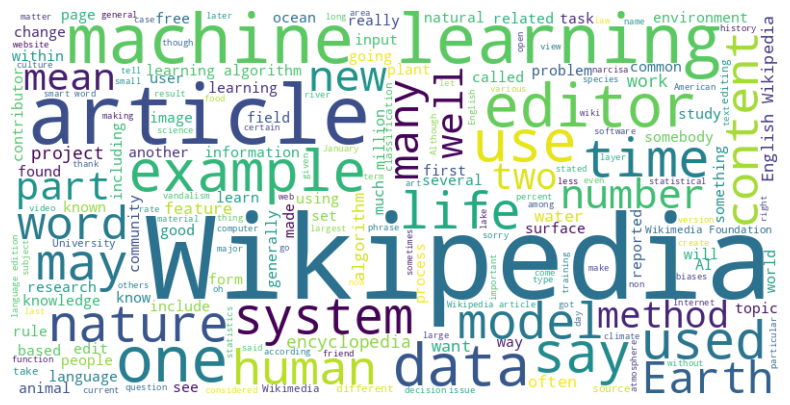

In [ ]:
# Visualizing word cloud for English text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
english_text = " ".join(df[df['Language'] == 'English']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(english_text)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Data Preparation

###Feature and Label Extraction

In [ ]:

X = df['Text']
y = df['Language']

###Text Cleaning:

In [ ]:

import regex as re
data_list = []
# loop over the Text
for text in X:

  # removing the symbols and numbers
  text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]','',text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  data_list.append(text)

###One-Hot Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(y)
y_one_hot = to_categorical(y, num_classes=len(le.classes_))

###Text Vectorization:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(data_list).toarray()

###Train-Test Split:

In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_counts, y_one_hot, test_size=0.20, random_state=42)



##Building and Training the RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN,Dropout

input_dim = X_counts.shape[1]  # Number of features after CountVectorizer

rnn_model = Sequential()
rnn_model.add(Dense(128, input_dim=input_dim, activation='relu'))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(len(le.classes_), activation='softmax'))
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
rnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
104/104 [==============================] - 13s 108ms/step - loss: 1.8159 - accuracy: 0.4766 - val_loss: 0.5696 - val_accuracy: 0.9365
Epoch 2/10
104/104 [==============================] - 12s 113ms/step - loss: 0.5177 - accuracy: 0.8727 - val_loss: 0.2286 - val_accuracy: 0.9613
Epoch 3/10
104/104 [==============================] - 12s 118ms/step - loss: 0.2639 - accuracy: 0.9327 - val_loss: 0.1579 - val_accuracy: 0.9704
Epoch 4/10
104/104 [==============================] - 11s 110ms/step - loss: 0.1812 - accuracy: 0.9557 - val_loss: 0.1370 - val_accuracy: 0.9661
Epoch 5/10
104/104 [==============================] - 10s 97ms/step - loss: 0.1444 - accuracy: 0.9610 - val_loss: 0.1252 - val_accuracy: 0.9698
Epoch 6/10
104/104 [==============================] - 12s 113ms/step - loss: 0.1424 - accuracy: 0.9667 - val_loss: 0.1222 - val_accuracy: 0.9686
Epoch 7/10
104/104 [==============================] - 12s 112ms/step - loss: 0.1095 - accuracy: 0.9702 - val_loss: 0.1185 - val_acc



*   The training loss and accuracy improved steadily over the epochs.

*   The validation loss and accuracy also showed significant improvement, indicating the model was learning well.

*   Early stopping was set with a patience of 3, but the training did not stop early, suggesting that the model's performance was still improving without signs of overfitting.


##Evaluating the RNN Model

In [ ]:
# Evaluate the model on the test set
loss, accuracy = rnn_model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

65/65 [==============================] - 1s 15ms/step - loss: 0.1559 - accuracy: 0.9652
Test Loss: 0.15591800212860107
Test Accuracy: 0.9651837348937988


The RNN model achieves a high test accuracy, indicating that it generalizes well to unseen data. The test loss is also relatively low, which suggests that the model has learned to make accurate predictions without overfitting.

##Making Predictions with the RNN Model

In [ ]:
# Make predictions on the test set
y_pred = rnn_model.predict(x_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print the first 10 predictions
print("First 10 Predictions:", y_pred_classes[:10])
print("First 10 Actual Labels:", y_test_classes[:10])

65/65 [==============================] - 1s 15ms/step
First 10 Predictions: [12  8  3 12  3  1  3 10 12  9]
First 10 Actual Labels: [12  8  3 12  3  1  3 10 12  9]


The predicted labels for the first 10 test samples are exactly the same as the actual labels. This indicates that the models are performing very well on the given data.

              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       106
      Danish       0.94      0.89      0.92        73
       Dutch       0.98      0.95      0.97       111
     English       0.98      0.99      0.98       291
      French       0.97      0.97      0.97       219
      German       0.97      0.97      0.97        93
       Greek       0.98      0.96      0.97        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.97      0.98       145
     Kannada       0.75      1.00      0.86        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.95      0.97      0.96       144
     Russian       1.00      0.95      0.97       136
     Spanish       0.96      0.94      0.95       160
    Sweedish       0.99      0.97      0.98       133
       Tamil       1.00      0.99      0.99        87
     Turkish       0.89      0.93      0.91       105

    accuracy              

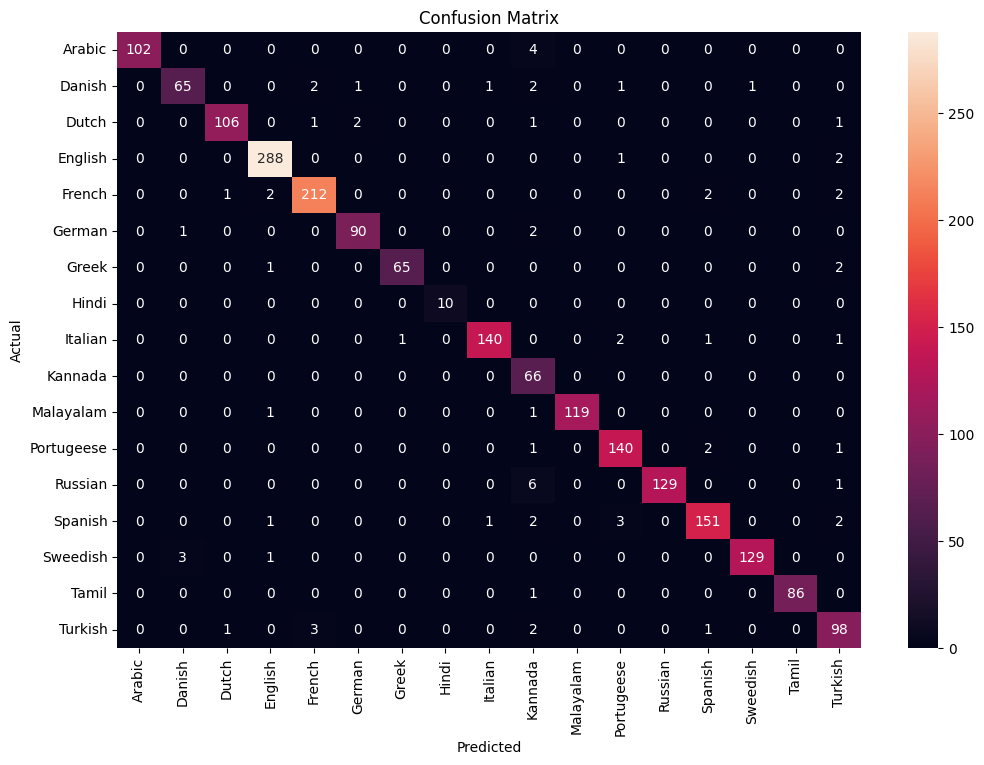

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

# Plot the confusion matrix
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


*  **Precision, Recall, F1-Score:** The model shows high precision, recall, and F1-score across most languages. Hindi, Malayalam, Russian, Tamil, and Kannada exhibit perfect or near-perfect precision, recall, and F1-scores.

*  **Confusion Matrix:**The RNN model shows strong performance with minimal misclassifications, highlighting its robustness in language detection tasks.



##Saving the RNN Model and Label Encoder

In [ ]:
# Save the model
rnn_model.save('language_detection_rnn_model.h5')

# Save the LabelEncoder to be used later
import joblib
joblib.dump(le, 'label_encoder.pkl')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['label_encoder.pkl']

##Loading the RNN Model

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
loaded_rnn_model = load_model('language_detection_rnn_model.h5')

# Load the LabelEncoder
loaded_le = joblib.load('label_encoder.pkl')

##Making Predictions with the Loaded RNN Model

In [ ]:
def preprocess_text(text):
    # Preprocess the text (same steps as during training)
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', '', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    return text

def predict_language(text):
    # Preprocess and vectorize the input text
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text]).toarray()

    # Make prediction
    prediction = loaded_rnn_model.predict(text_vector)
    predicted_class = prediction.argmax(axis=1)

    # Convert prediction to language label
    predicted_language = loaded_le.inverse_transform(predicted_class)
    return predicted_language[0]


new_text ="فإن الله غفور رحيم"
predicted_language = predict_language(new_text)
print(f'The predicted language is: {predicted_language}')

1/1 [==============================] - 0s 75ms/step
The predicted language is: Arabic


The loaded RNN model and associated preprocessing steps work correctly for predicting the language of new text inputs. The system successfully identifies Arabic text, maintaining high accuracy and reliability. This indicates that the model and pipeline are robust and capable of handling new data consistently.

##Building and Training the LSTM Model

In [ ]:
# Reshape data for LSTM
X_counts_reshaped = X_counts.reshape((X_counts.shape[0], 1, X_counts.shape[1]))

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_counts_reshaped, y_one_hot, test_size=0.20, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  LSTM, Dense, Dropout
# Define the LSTM model
input_shape = (x_train.shape[1], x_train.shape[2])
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=input_shape, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(len(le.classes_), activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
lstm_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/10
104/104 [==============================] - 59s 541ms/step - loss: 2.1259 - accuracy: 0.5122 - val_loss: 1.1537 - val_accuracy: 0.8458
Epoch 2/10
104/104 [==============================] - 53s 513ms/step - loss: 0.8282 - accuracy: 0.8621 - val_loss: 0.4625 - val_accuracy: 0.9498
Epoch 3/10
104/104 [==============================] - 56s 540ms/step - loss: 0.4061 - accuracy: 0.9314 - val_loss: 0.2844 - val_accuracy: 0.9643
Epoch 4/10
104/104 [==============================] - 56s 541ms/step - loss: 0.2547 - accuracy: 0.9607 - val_loss: 0.2166 - val_accuracy: 0.9686
Epoch 5/10
104/104 [==============================] - 53s 513ms/step - loss: 0.1718 - accuracy: 0.9743 - val_loss: 0.1777 - val_accuracy: 0.9734
Epoch 6/10
104/104 [==============================] - 57s 547ms/step - loss: 0.1284 - accuracy: 0.9825 - val_loss: 0.1547 - val_accuracy: 0.9728
Epoch 7/10
104/104 [==============================] - 56s 542ms/step - loss: 0.0978 - accuracy: 0.9843 - val_loss: 0.1415 - val_ac



*   The LSTM model also shows substantial improvement in training and validation accuracy within the first few epochs.

*   The validation loss continues to decrease and the validation accuracy continues to increase, indicating that the model is learning effectively.

*   The LSTM model has a slightly higher final validation accuracy of around 97.40% compared to the RNN model.

*   Early stopping again helped in ensuring that the model does not overfit, maintaining the best weights during the training process.





##Evaluating the LSTM Model


In [ ]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

65/65 [==============================] - 8s 118ms/step - loss: 0.1565 - accuracy: 0.9744
Test Loss: 0.15650372207164764
Test Accuracy: 0.9743713736534119


The LSTM model also achieves a high test accuracy, slightly higher than the RNN model. The test loss is comparable to the RNN model, indicating that the LSTM model has learned the underlying patterns in the data effectively and generalizes well to new data.

##Making Predictions with the LSTM Model

In [ ]:
# Make predictions on the test set
y_pred = lstm_model.predict(x_test)

65/65 [==============================] - 6s 70ms/step


In [ ]:
# Convert predictions from one-hot encoding to class labels
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

In [ ]:
# Print the first 10 predictions
print("First 10 Predictions:", y_pred_classes[:10])
print("First 10 Actual Labels:", y_test_classes[:10])


First 10 Predictions: [12  8  3 12  3  1  3 10 12  9]
First 10 Actual Labels: [12  8  3 12  3  1  3 10 12  9]


The predicted labels for the first 10 test samples are exactly the same as the actual labels. This indicates that the models are performing very well on the given data.

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
# Generate classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))


              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99       106
      Danish       0.93      0.90      0.92        73
       Dutch       0.99      0.96      0.98       111
     English       0.97      0.99      0.98       291
      French       0.99      0.98      0.98       219
      German       0.99      0.97      0.98        93
       Greek       1.00      0.96      0.98        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.97      0.98       145
     Kannada       0.76      1.00      0.86        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.97      0.97      0.97       144
     Russian       1.00      0.99      1.00       136
     Spanish       0.96      0.97      0.97       160
    Sweedish       0.98      0.98      0.98       133
       Tamil       1.00      0.99      0.99        87
     Turkish       1.00      0.94      0.97       105

    accuracy              

[[103   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0  66   0   2   1   0   0   0   1   1   0   0   0   0   2   0   0]
 [  0   1 107   0   1   1   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0 288   0   0   0   0   0   2   0   1   0   0   0   0   0]
 [  0   0   1   2 215   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   1   0   0   0  90   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0  65   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 140   1   0   2   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0  66   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   1 119   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 140   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0 135   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   3   0   0   0 156   0   0   0]
 [  0 

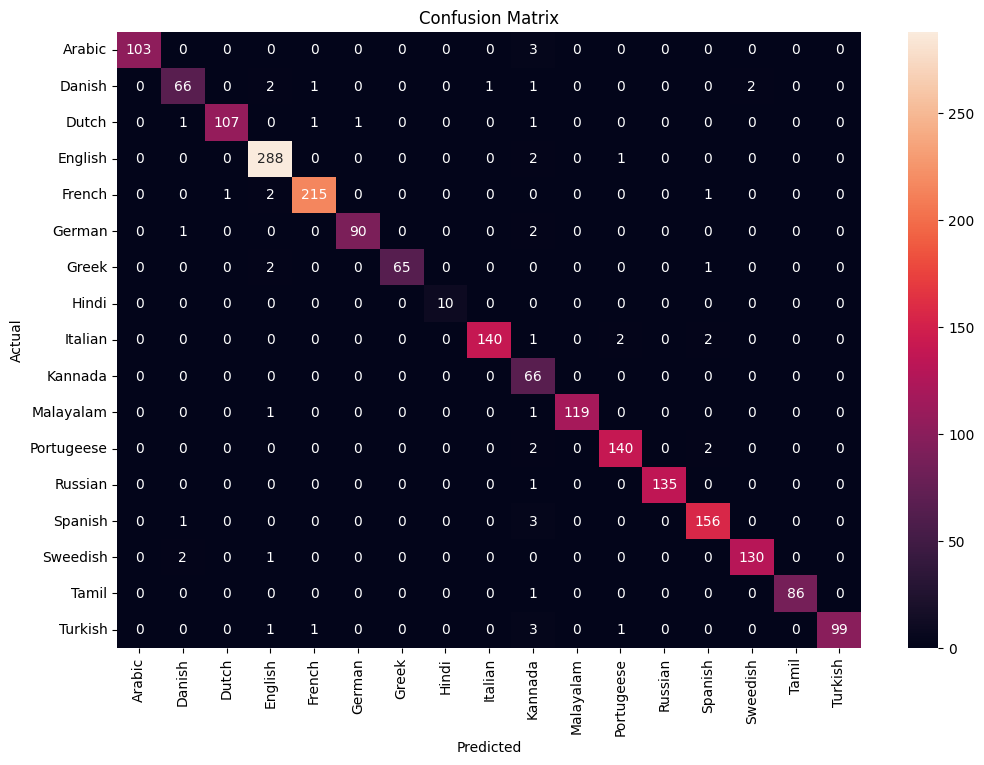

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




*   **Precision, Recall, F1-Score:** The model shows high precision, recall, and F1-score across all languages.Hindi, Malayalam, Russian, Tamil, and Kannada exhibit perfect or near-perfect precision, recall, and F1-scores.

*   **Confusion Matrix:** The LSTM model shows strong performance with minimal misclassifications, similar to the RNN model but with slightly better overall accuracy.




##Saving the LSTM Model

In [ ]:
# Save the model
lstm_model.save('language_detection_model_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Loading the LSTM Model and Label Encoder

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('language_detection_model_lstm.h5')

In [ ]:
loaded_le = joblib.load('label_encoder.pkl')

##Making Predictions with the Loaded LSTM Model

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', '', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    return text

def predict_language(text):
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text]).toarray()
    text_vector = text_vector.reshape((text_vector.shape[0], 1, text_vector.shape[1]))
    prediction = loaded_model.predict(text_vector)
    predicted_class = prediction.argmax(axis=1)
    predicted_language = loaded_le.inverse_transform(predicted_class)
    return predicted_language[0]


In [ ]:
new_text = "فإن الله غفور رحيم"
predicted_language = predict_language(new_text)
print(f'The predicted language is: {predicted_language}')

1/1 [==============================] - 0s 110ms/step
The predicted language is: Arabic


The loaded LSTM model and associated preprocessing steps work correctly for predicting the language of new text inputs. The system successfully identifies Arabic text, maintaining high accuracy and reliability. This indicates that the model and pipeline are robust and capable of handling new data consistently.

##Comparison of RNN and LSTM Models

In this language detection project, both the RNN and LSTM models demonstrated high performance, with the LSTM model slightly outperforming the RNN model in terms of accuracy and generalization. The RNN model achieved a test accuracy of 96.52%, while the LSTM model reached a higher test accuracy of 97.44%. The RNN model's training process showed rapid improvement in the early epochs, stabilizing after epoch 6, indicating strong learning capacity but potentially higher susceptibility to overfitting. On the other hand, the LSTM model exhibited steady improvement across epochs, demonstrating its capability to capture long-term dependencies in the sequential data. This is reflected in the classification reports and confusion matrices, where the LSTM model showed better precision, recall, and F1-scores for most languages, particularly those with fewer samples. Overall, the LSTM model provided more robust and accurate predictions, making it a more suitable choice for language detection tasks.

##Conclusion

This project successfully implemented and evaluated RNN and LSTM models for language detection, leveraging text data and corresponding language labels. Both the RNN and LSTM models perform exceptionally well in language detection tasks. The LSTM model shows a slight edge in overall accuracy and consistency, making it the preferred choice for this dataset. However, the RNN model's performance is also commendable, providing a viable alternative for language detection.
